In [1]:
import distutils
import distutils.util
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import os.path as opath
import ast
import json
from pandas.io.json import json_normalize
import datetime
import pickle
import re
from datetime import datetime
from IPython.core.display import HTML
from IPython.core.interactiveshell import InteractiveShell
import scipy.stats as stats
import statsmodels.stats.weightstats as wstats
import math
import random 
import scipy
import scipy.stats as stats
InteractiveShell.ast_node_interactivity = "all"
from sklearn import preprocessing
%matplotlib inline

<div class="span5 alert alert-info">
<h2>Note book details</h2>

<p> This notebook is for <b>data story</b> for <b>kickstarter success prediction</b> project.</p>

<p> Notes.</p>
<ol>
<li>  The file will statistical analysis to establish whether one field has a significant impact on the another</li> 
<li>  The file will address the explore some hypothesis on the data</li> 
<li>What are the null and alternate hypotheses?</li>
<li>Compute margin of error, confidence interval, and p-value.</li>
<li>Write a story describing the statistical significance in the context or the original problem.</li>
<li>  The hypothesis analyzed are as follows: 
    <ul>
     <li>Hypothesis 1 :Whether no of backer has a significant different for fail and successful projects</li>
     <li>Hypothesis 2 :Does your analysis mean that staff pick has impact on  success?</li>
     <li>Question 1 :What is range pledge amount range for successful & failed projects with high confidence ?</li>
     <li>Question 2 :What is range goal amount range for successful & failed projects with high confidence ?</li>
    </ul>
</li>        
</ol>
</div>

In [2]:
pd.set_option('display.max_colwidth', -1)
color_success='#00ff66'#kickstarter green#'#2BDE73'
color_fail='#FF192F'#'#FFC7CE'#'#FFC7CE'#'#FF0000' # red
stateSuccess='Successful'
stateFail='Failed'
# the statistical significance value is 5%
siginificane_level =0.005
# for 95% the critcal z value is 1.96 ( based on z table)
critical_value =1.96
noofsample=100

In [3]:
# from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
cssAnalysis = '.analysis {background:#5bffc0; }'
HTML('<style>{} {}</style>'.format(css,cssAnalysis))
pickle_file='DataStory_Jan2017_Jan2018.sa'
df_final_months = pickle.load( open( pickle_file, "rb" ) )
#df_final_months.info()
#df_final_months.head()

In [4]:
# filter out suspened, cancleed and live projects
df_fail_success= df_final_months[(df_final_months.state==stateSuccess) | (df_final_months.state==stateFail)]
_=df_fail_success.set_index('project_id')
#df_fail_success.head()

## Helper methods

In [5]:
def CreateSampleofSample(df,col,numberineachsample):
    listofrecord = list(df[analyzecol])
    totalofsample=len(listofrecord)
    for a in range(0,int(totalofsample/numberineachsample)):
        yield (round(np.average(random.sample(listofrecord, numberineachsample)),0))

In [6]:
def GetDataFrameFromList(listofval,colname):
    return pd.DataFrame({colname:listofval})

In [7]:
def GetCLTDataframe(df,col,numberineachsample):
    returnval= []
    returnval.extend(CreateSampleofSample(df,analyzecol, numberineachsample))
    return GetDataFrameFromList(returnval,analyzecol)
    

##  Hypothesis testing start

<div class="span5 alert alert-info">
<h4>
1 :Whether no of backer has a significant different for fail and successful projects?</h4>
</div>

<div class="span5 alert alert-info" style="background-color:#ffff66; color:black">
<b>Answer :</b> The hypothesis are as follows
    <br/>
    <b> Null Hypothesis : </b> There is <b>no</b> difference in no of backer in successful or failed project. Which <i>means for no of backers for successful - means for no of backers for failed</i> equals <b>Zero</b> .
    <br/>
    <b> Alternate Hypothesis :  </b> There is <b>siginifcant</b> difference in no of backer in successful or failed project. Which <i>means for no of backers for successful - means for no of backers for failed</i> not equals <b>Zero</b> .
</div>

In [8]:
analyzecol='backers_count'
dfHypo=df_fail_success.loc[:,['state',analyzecol,'usd_goal']]

#### Get the dataframe with means of sample based on 100 no of sample in each 

In [9]:
dfHypo_success=GetCLTDataframe(dfHypo[dfHypo.state==stateSuccess],analyzecol,noofsample)
dfHypo_fail=GetCLTDataframe(dfHypo[dfHypo.state==stateFail],analyzecol,noofsample)

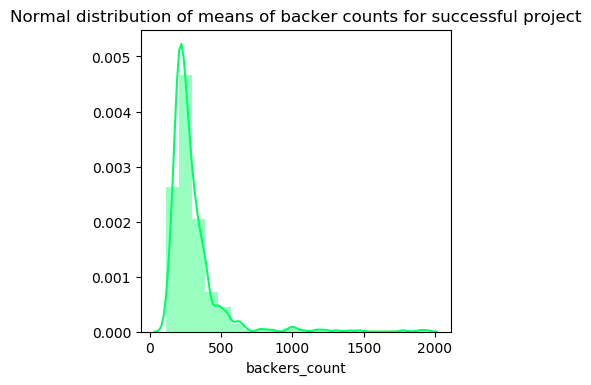

In [10]:
#check by plotting the graph
#check by plotting the graph
fig, axis = plt.subplots(figsize=(4,4),dpi=100)

_=sns.distplot(dfHypo_success[analyzecol],bins=20,color=color_success,ax=axis)
_=axis.set_title('Normal distribution of means of backer counts for successful project')

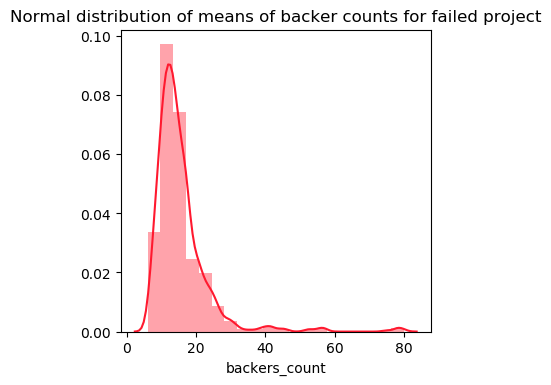

In [11]:
#check by plotting the graph
fig, axis = plt.subplots(figsize=(4,4),dpi=100)

_=sns.distplot(dfHypo_fail[analyzecol],bins=20,color=color_fail,ax=axis)
_=axis.set_title('Normal distribution of means of backer counts for failed project')

In [12]:
dfHypo_success.describe()

,backers_count
count,748.000000
mean,296.609626
std,184.137535
min,112.000000
25%,206.750000
50%,250.500000
75%,326.000000
max,1937.000000


In [13]:
dfHypo_fail.describe()

,backers_count
count,828.000000
mean,15.567633
std,8.316823
min,6.000000
25%,11.000000
50%,14.000000
75%,17.000000
max,80.000000


#### Calculate Z scorw and p socre for this 

In [14]:
zstat, pvalue = wstats.ztest(dfHypo_success[analyzecol], dfHypo_fail[analyzecol], alternative='two-sided',
                    value=0, usevar='pooled', ddof=1.0)
print ('The z stat is {} and p value is {}'.format(zstat,pvalue))

The z stat is 43.870132496700215 and p value is 0.0


####  Calculate T score and p value to test same hypothesis

In [15]:
# T-score
tstat, p_from_t = stats.ttest_ind(dfHypo_success[analyzecol], dfHypo_fail[analyzecol], equal_var=False)
print('t-statistic: ', tstat)
print('p-value: ', p_from_t)

t-statistic:  41.7042079574
p-value:  1.55455807326e-197


In [16]:
if (p_from_t<siginificane_level):
    print ('The calulcated p value is lower then 0.05 % significant value will allow to reject the null hypothesis')
else:
    print('Null hypotheses is true')

The calulcated p value is lower then 0.05 % significant value will allow to reject the null hypothesis


<div class="span5 alert alert-info analysis" >
<h4>
Conclusion : What is project count as per project status? What is successful and failed ratio ?</h4>
    <ul>
     <li> There is enough evidence to reject Null hypothesis </li> 
     <li> The conculsion is that pledge amount for failed and successful  project vaires  </li> 
    </ul>
</div>

<div class="span5 alert alert-info">
<h4>
2 :Does your analysis mean that staff pick has impact on  success?</h4>
</div>

<div class="span5 alert alert-info" style="background-color:#ffff66; color:black">
<b>Answer :</b> The hypothesis are as follows
    <br/>
    <b> Null Hypothesis : </b> There is <b>no</b> difference in successful project with staff pick or without staff pick. Which <i>means for successful project with staff pick- successful prject with staff pick</i> equals <b>Zero</b> .
    <br/>
    <b> Null Hypothesis : </b> There is <b>no</b> difference in successful project with staff pick or without staff pick. Which <i>means for successful project with staff pick- successful prject with staff pick</i> not equals <b>Zero</b> . .
</div>

In [17]:
analyzecol='staff_pick'
dfHypo=df_fail_success.loc[:,['state',analyzecol]]

#### Get the dataframe with means of sample based on 100 no of sample in each 

In [18]:
lab_enc = preprocessing.LabelEncoder()
_=lab_enc.fit(dfHypo['state'])
state_val = lab_enc.transform(dfHypo['state'])
_=dfHypo.loc[:, 'state_val'] = state_val

#state_val = lab_enc.transform(dfHypo_pick['state'])
#dfHypo_pick.loc[:, 'state_val'] = state_val
#state_val = lab_enc.transform(dfHypo_notpick['state'])
#dfHypo_notpick.loc[:, 'state_val'] = state_val

In [19]:
dfHypo_pick=dfHypo[dfHypo.staff_pick==1]
dfHypo_notpick=dfHypo[dfHypo.staff_pick!=1]

In [20]:
dfHypo_pick.describe()

,state_val
count,20967.000000
mean,0.836219
std,0.370086
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [21]:
dfHypo_notpick.describe()

,state_val
count,136776.000000
mean,0.419036
std,0.493403
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
# variable 
# for 95% the critcal z value is 1.96 ( based on z table)
critical_value =1.96

mean_staff_pick, sd_staff_pick, var_staff_pick= dfHypo_pick.state_val.mean(), dfHypo_pick.state_val.std(), dfHypo_pick.state_val.var()
mean_non_staff_pick, sd_non_staff_pick, var_non_staff_pick= dfHypo_notpick.state_val.mean(), dfHypo_notpick.state_val.std(), dfHypo_notpick.state_val.var()

print (' The mean for staff pick project is ' + str(mean_staff_pick))
print (' The standard deviation for staff pick project is ' + str(sd_staff_pick))
print (' The varience for staff pick project is ' + str(var_staff_pick))
print (' The mean for non staff pick project is ' + str(mean_non_staff_pick))
print (' The standard deviation for non staff pick project is ' + str(sd_non_staff_pick))
print (' The varience for non staff pick project is ' + str(var_non_staff_pick))

 The mean for staff pick project is 0.8362188200505556
 The standard deviation for staff pick project is 0.3700857162569254
 The varience for staff pick project is 0.13696343737740146
 The mean for non staff pick project is 0.4190355033046733
 The standard deviation for non staff pick project is 0.49340300988876445
 The varience for non staff pick project is 0.24344653016729217


#### Mean for all calls based on bernoulli distribution is difference of  population mean (non_color) calls and population mean(color) calls

In [23]:
difference_population_mean =mean_staff_pick-mean_non_staff_pick
difference_population_mean

0.41718331674588227

####  Variance for all calls based on bernoulli distribution is sum of  Variance (non_color) calls and Variance(color) calls

In [24]:
# proporation calculation for staff pick project people
length_staff_pick=len(dfHypo_pick)# total no of staff pick
length_staff_pick_success=len(dfHypo_pick[dfHypo_pick.state_val==1]) # staff pick success
proporation_staff_pick_success=length_staff_pick_success/length_staff_pick # population proporation of staff pick success
print('The total staff pick project with success in population '+str(length_staff_pick_success))
print('The total staff pick project in population '+str(length_staff_pick))
print('The staff pick project with success /  total staff pick '+str(proporation_staff_pick_success))

# proporation calculation for non colored people
length_not_staff_pick=len(dfHypo_notpick)# total no of not staff pick
length_non_staff_pick_sucess=len(dfHypo_notpick[dfHypo_notpick.state_val==1])#  not staff pick success
proporation_not_staff_pick_success=length_non_staff_pick_sucess/length_not_staff_pick # population proporation of staff pick not success
print('The total non staff pick project with success in population '+str(length_non_staff_pick_sucess))
print('he total non staff pick project in population  '+str(length_not_staff_pick))
print('The non staff pick project with success /  total non staff pick '+str(proporation_not_staff_pick_success))

# calculate variance of color people
#P(1-p)/N
variance_staff_pick=(proporation_staff_pick_success*(1-proporation_staff_pick_success))/length_not_staff_pick
print('The staff pick success variance %.12f' % float(variance_staff_pick))

# calculate variance of non color people
variance_non_staff_pick=(proporation_not_staff_pick_success*(1-proporation_not_staff_pick_success))/length_not_staff_pick
print('The non staff pick success variance %.12f' % float(variance_non_staff_pick))

population_variance=variance_staff_pick+variance_non_staff_pick

print('The total population varience %.12f' % (float(population_variance)))

The total staff pick project with success in population 17533
The total staff pick project in population 20967
The staff pick project with success /  total staff pick 0.8362188200505556
The total non staff pick project with success in population 57314
he total non staff pick project in population  136776
The non staff pick project with success /  total non staff pick 0.4190355033046733
The staff pick success variance 0.000001001323
The non staff pick success variance 0.000001779879
The total population varience 0.000002781202


####  standard deviation for all calls square root of total varaience

In [25]:
# standard devaiation for total population
population_standard_deviation=math.sqrt(population_variance)
print('The total population standard deviation '+str(population_standard_deviation))

The total population standard deviation 0.0016676935524269536


#### 95 % chance which is critical value(1.96) that poupulaton mean (true mean) is within  difference of population  mean (0.032) will be Confidence interval

In [26]:
# 95 % chance for confidence interval 
conf_interval= critical_value*population_standard_deviation

print('The confidence interval with 95 % '+str(conf_interval))

The confidence interval with 95 % 0.003268679362756829


In [27]:
# margin of erro 
difference_population_mean+np.array([-1, 1]) * conf_interval

array([ 0.41391464,  0.420452  ])

In [28]:
# null hypoths,p1=p2
# z score for 
null_hypothese_proporation=(length_non_staff_pick_sucess+length_staff_pick_success)/(length_staff_pick+length_not_staff_pick)  #(157+235)/4870
#new sd based on hypo= math.sqrt(2p*(1-p)/n)
standard_deviation_z=math.sqrt((1*null_hypothese_proporation*(1-null_hypothese_proporation))*(((1/length_staff_pick)+(1/length_not_staff_pick))))
print(standard_deviation_z)

0.0037034445057331005


In [29]:
#t=difference_population_mean-0/(new sd based on hypo)
z_value = (difference_population_mean-0)/standard_deviation_z
print (z_value)
#z_value = (difference_population_mean-0)/standard_deviation_z
#print (z_value)

112.64737897383463


In [30]:
#p_value=stats.norm.cdf(z_value)
p_value = scipy.stats.norm.sf(abs(z_value))*2
print('The p value from the z value above is %.12f' %float(p_value))
#print((p_value))

The p value from the z value above is 0.000000000000


In [31]:
if (z_value>critical_value):
    print ('The calulcated z-score is higher then crital z value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The calulcated z-score is higher then crital z value hence reject the null hypothesis


#### Recheck Z zcore using wstat

In [32]:
zstat, pvalue = wstats.ztest(dfHypo_pick['state_val'],dfHypo_notpick['state_val'], alternative='two-sided',
                    value=0, usevar='pooled', ddof=1.0)
print ('The z stat is '+str(zstat)+ ' and p value is ' +str(pvalue))

The z stat is 117.47059759 and p value is 0.0


In [33]:
if (zstat>critical_value):
    print ('The calulcated z-score is higher then crital z value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The calulcated z-score is higher then crital z value hence reject the null hypothesis


In [34]:
if (pvalue<siginificane_level):
    print ('The calulcated p value is lower then 0.05 % significant value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The calulcated p value is lower then 0.05 % significant value hence reject the null hypothesis


#### Try checking null hypothesis usint T score

In [35]:
# T-score
tstat, p_from_t = stats.ttest_ind(dfHypo_pick['state_val'],dfHypo_notpick['state_val'],equal_var=False)
print('t-statistic: ', tstat)
print('p-value: ', p_from_t)

if (tstat>critical_value):
    print ('The calulcated t-score is higher then crital z value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

siginificane_level =0.005
if (p_from_t<siginificane_level):
    print ('The calulcated p value is lower then 0.05 % significant value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

t-statistic:  144.699912663
p-value:  0.0
The calulcated t-score is higher then crital z value hence reject the null hypothesis
The calulcated p value is lower then 0.05 % significant value hence reject the null hypothesis


In [36]:
if (tstat>critical_value):
    print ('The calulcated t-score is higher then crital z value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The calulcated t-score is higher then crital z value hence reject the null hypothesis


In [37]:
if (p_from_t<siginificane_level):
    print ('The calulcated p value is lower then 0.05 % significant value hence reject the null hypothesis')
else:
    print('Null hypotheses is true')

The calulcated p value is lower then 0.05 % significant value hence reject the null hypothesis


<div class="span5 alert alert-info analysis" >
<h4>
Conclusion : What is project count as per project status? What is successful and failed ratio ?</h4>
    <ul>
     <li> There is enough evidence to reject Null hypothesis </li> 
     <li> The conculsion is that staff pick has impact on success of project  </li> 
    </ul>
</div>

##  Finding margin range

<div class="span5 alert alert-info">
<h4>
2 What is average pledge amount range for successful & failed projects with high confidence ?</h4>
</div>

#### With 95 % confidence  interval (1.96)

In [38]:
analyzecol='usd_pledged'
dfHypo_success=df_fail_success[dfHypo.state==stateSuccess].loc[:,['state',analyzecol]]

In [39]:
# for 95% the critcal z value is 1.96 ( based on z table)
critical_z_value =1.96
sample_mean,sample_sd=dfHypo_success.usd_pledged.mean(),dfHypo_success.usd_pledged.std()
confidence_interval =(critical_z_value*sample_sd)/math.sqrt(len(dfHypo_success))
confidence_interval
print ('For average {} The confidence interval is {}. The margin of range is between {} to {}'.format(sample_mean,confidence_interval,(sample_mean-confidence_interval ),(sample_mean+confidence_interval ) ))

1260.7826206173368

For average 24693.954562083145 The confidence interval is 1260.7826206173368. The margin of range is between 23433.171941465807 to 25954.737182700483


In [40]:
dfHypo_fail=df_fail_success[dfHypo.state==stateFail].loc[:,['state',analyzecol,'usd_goal']]

In [41]:
# for 95% the critcal z value is 1.96 ( based on z table)
critical_z_value =1.96
sample_mean,sample_sd=dfHypo_fail.usd_pledged.mean(),dfHypo_fail.usd_pledged.std()
confidence_interval =(critical_z_value*sample_sd)/math.sqrt(len(dfHypo_success))
confidence_interval
print ('For average {} The confidence interval is {}. The margin of range is between {} to {}'.format(sample_mean,confidence_interval,(sample_mean-confidence_interval ),(sample_mean+confidence_interval ) ))

54.248397158134495

For average 1267.0489921847673 The confidence interval is 54.248397158134495. The margin of range is between 1212.8005950266327 to 1321.2973893429019


<div class="span5 alert alert-info analysis" >
<h4>
Conclusion : What is average pledge amount range for successful & failed projects with high confidence ?</h4>
    <ul>
      <li> The average pledge amount for successful project is 24694.00 USD</li> 
     <li> With 95 % confidence level the pldege amount should be between 23433.17 USD and  25954.73 USD  </li> 
     <li> The average pledge amount for failes project is 1267.05 USD</li> 
     <li> With 95 % confidence level the pldege amount should be between 1212.80 USD and  1321.30 USD  </li> 
     <li> The pledge amount seems to be factor on failure and success of project  </li> 
    </ul>
</div>

<div class="span5 alert alert-info">
<h4>
2 What is average goal amount range for successful & failed projects with high confidence ?</h4>
</div>

#### With 95 % confidence  interval (1.96)

In [42]:
analyzecol='usd_goal'
dfHypo_success=df_fail_success[dfHypo.state==stateSuccess].loc[:,['state',analyzecol]]

In [43]:
# for 95% the critcal z value is 1.96 ( based on z table)
critical_z_value =1.96
sample_mean,sample_sd=dfHypo_success.usd_goal.mean(),dfHypo_success.usd_goal.std()
confidence_interval =(critical_z_value*sample_sd)/math.sqrt(len(dfHypo_success))
confidence_interval
print ('For average {} The confidence interval is {}. The margin of range is between {} to {}'.format(sample_mean,confidence_interval,(sample_mean-confidence_interval ),(sample_mean+confidence_interval ) ))

244.28713449202203

For average 10449.953448154301 The confidence interval is 244.28713449202203. The margin of range is between 10205.66631366228 to 10694.240582646324


In [44]:
dfHypo_fail=df_fail_success[dfHypo.state==stateFail].loc[:,['state',analyzecol]]

In [45]:
# for 95% the critcal z value is 1.96 ( based on z table)
critical_z_value =1.96
sample_mean,sample_sd=dfHypo_fail.usd_goal.mean(),dfHypo_fail.usd_goal.std()
confidence_interval =(critical_z_value*sample_sd)/math.sqrt(len(dfHypo_success))
confidence_interval
print ('For average {} The confidence interval is {}. The margin of range is between {} to {}'.format(sample_mean,confidence_interval,(sample_mean-confidence_interval ),(sample_mean+confidence_interval ) ))

10189.7462606554

For average 70351.00029641246 The confidence interval is 10189.7462606554. The margin of range is between 60161.254035757054 to 80540.74655706786


<div class="span5 alert alert-info analysis" >
<h4>
Conclusion : What is average pledge amount range for successful & failed projects with high confidence ?</h4>
    <ul>
      <li> The average pledge amount for successful project is 10450.00 USD</li> 
     <li> With 95 % confidence level the pldege amount should be between 10205.67 USD and  10694.24 USD  </li> 
     <li> The average pledge amount for failes project is 70351.00 USD</li> 
     <li> With 95 % confidence level the pldege amount should be between 60161.25 USD and  80540.75 USD  </li> 
     <li> The goal amount seems to be factor on failure and success of project  </li> 
    </ul>
</div>

In [46]:
## End